# Final Project

In [3]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    sci

In [148]:
import numpy as np 
import pandas as pd 
from geopy.geocoders import Nominatim 
import folium 
import seaborn as sns
import locale
from locale import atof

In [149]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Getting Census Data

In [150]:
csv_path='https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv'
df = pd.read_csv(csv_path,encoding='latin1')

In [151]:
df.head()

,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designat

In [152]:
Neigh = list(df.columns.values)
Neigh = Neigh[5:]

In [154]:
# Making df for data
dfTorNeigh = pd.DataFrame(index=Neigh, columns=["Population/squr_km","Average Income"])
dfTorNeigh.head()

,Population/squr_km,Average Income
Agincourt North,NaN,NaN
Agincourt South-Malvern West,NaN,NaN
Alderwood,NaN,NaN
Annex,NaN,NaN
Banbury-Don Mills,NaN,NaN


In [155]:
# Filling df with data
for index, row in dfTorNeigh.iterrows():
    dfTorNeigh.at[index, 'Population/squr_km'] = df[index][7] # row 8 is "Population density per square kilometre"
    dfTorNeigh.at[index, 'Average Income'] = df[index][2354] # row 2355 is "After-tax income: Average amount ($)"

dfTorNeigh.head(10)

,Population/squr_km,Average Income
Agincourt North,"3,929","26,955"
Agincourt South-Malvern West,"3,034","27,928"
Alderwood,"2,435","39,159"
Annex,"10,863","80,138"
Banbury-Don Mills,"2,775","51,874"
Bathurst Manor,"3,377","37,927"
Bay Street Corridor,"14,097","43,427"
Bayview Village,"4,195","41,440"
Bayview Woods-Steeles,"3,240","38,196"
Bedford Park-Nortown,"4,209","85,678"


In [156]:
# Changing type from string to float
dfTorNeigh = dfTorNeigh.apply(lambda x: x.str.replace(',', '').astype(float), axis=1)

In [157]:
# Sorting by Average income
df1 = dfTorNeigh.sort_values(by=['Average Income'], ascending=False)

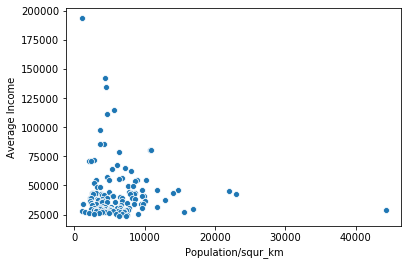

In [158]:
# Making scatterplot
sns.scatterplot(x="Population/squr_km", y="Average Income", data=df1)

## Getting FourSquare Data

In [14]:
!pip install BeautifulSoup4

     |████████████████████████████████| 112kB 28.9MB/s eta 0:00:01


In [159]:
import requests # library to handle requests
import random # library for random number generation
from bs4 import BeautifulSoup

from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [160]:
CLIENT_ID = 'S0UOGMPH5LISI3DKSMUOMMUP5W2VNVA52JQZS2RVMITYSX4L' # your Foursquare ID
CLIENT_SECRET = 'Q5J5GV0HHQDKWZHKCS4UMJLSID5Z3RMQY3UO1TRDH4CMJAZ2' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50

In [17]:
# Getting the top 50 food venues from FourSquare
page = requests.get(
    "https://foursquare.com/explore?mode=url&near=Toronto%2C%20ON%2C%20Canada&nearGeoId=72057594044095801&q=Food")

soup = BeautifulSoup(page.content, 'html.parser')

top_venues = soup.find_all('div', class_='venueDetails')

In [18]:
# Columns we want
venue_columns = ['id', 
                 'score', 
                 'category', 
                 'name', 
                 'address',
                 'city',
                 'href', 
                 'latitude', 
                 'longitude']

df_top_venues = pd.DataFrame(columns=venue_columns)

for venue in top_venues:
    
    # Extract the available attributes
    venue_name = venue.find(target="_blank").get_text()
    venue_score = venue.find(class_="venueScore positive").get_text()
    venue_cat = venue.find(class_="categoryName").get_text()
    venue_href = venue.find(class_="venueName").h2.a['href']
    venue_id = venue_href.split('/')[-1]

    if 'promotedTipId' in venue_id: 
        continue
        
    # Contruct the FourSquare venue API URL
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
        venue_id, 
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION)
    
    # Request the venue data
    result = requests.get(url).json()
        
    # Get the properly formatted address and the latitude and longitude
    venue_address = result['response']['venue']['location']['address']
    venue_city = result['response']['venue']['location']['city']
    venue_latitude = result['response']['venue']['location']['lat']
    venue_longitude = result['response']['venue']['location']['lng']
    
    # Add the venue to the top venues dataframe
    df_top_venues = df_top_venues.append({'id': venue_id,
                                          'score': venue_score,
                                          'category': venue_cat,
                                          'name': venue_name,
                                          'address': venue_address,
                                          'city': venue_city,
                                          'href': venue_href,
                                          'latitude': venue_latitude,
                                          'longitude': venue_longitude}, ignore_index=True)

In [19]:
# Cleaning the data
df_top_venues['score'] = pd.to_numeric(df_top_venues['score'], errors='coerce').fillna(0)

In [20]:
df_top_venues.head()

,id,score,category,name,address,city,href,latitude,longitude
0,593b43e3e185f37c5a529082,9.3,Eastern European,Tennessee Tavern,1554 Queen Street West,Toronto,/v/tennessee-tavern/593b43e3e185f37c5a529082,43.639971,-79.439874
1,4da70d0b90a00b5184013400,9.3,Pizza,Pizzeria Defina,321 Roncesvalles Avenue,Toronto,/v/pizzeria-defina/4da70d0b90a00b5184013400,43.648723,-79.449855
2,529612de11d2ab526191ccc9,9.3,Thai,Pai,18 Duncan St,Toronto,/v/pai/529612de11d2ab526191ccc9,43.647923,-79.388579
3,562c2fc8498e7ab0c0eacd56,9.3,Café,The Walton,607 College St,Toronto,/v/the-walton/562c2fc8498e7ab0c0eacd56,43.655045,-79.414363
4,5321f4d9e4b07946702e6e08,9.3,Mediterranean,Byblos Toronto,11 Duncan Street,Toronto,/v/byblos-toronto/5321f4d9e4b07946702e6e08,43.647615,-79.388381


In [21]:
# Getting info to create map
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.653963, -79.387207.


In [112]:
map_toronto2 = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(df_top_venues['latitude'], df_top_venues['longitude'], df_top_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto2)  
    
map_toronto2

## Further Restaurant Analysis

In [92]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import pickle

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [96]:
toronto_df3 = pd.read_csv("toronto_df2.csv")

In [97]:
toronto_df3.head()

,Unnamed: 0,Postcode,Borough,Neighborhood,Latitude,Longitude
0,37,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,43,M4M,East Toronto,Studio District,43.659526,-79.340923
4,44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [98]:
CLIENT_ID = 'S0UOGMPH5LISI3DKSMUOMMUP5W2VNVA52JQZS2RVMITYSX4L' # your Foursquare ID
CLIENT_SECRET = 'Q5J5GV0HHQDKWZHKCS4UMJLSID5Z3RMQY3UO1TRDH4CMJAZ2' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
categoryId = '4d4b7105d754a06374d81259'

In [99]:
# Definition to call for FourSquare venues
def getNearbyFood(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            categoryId,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [100]:
# Calling the function
toronto_food = getNearbyFood(names=toronto_df3['Neighborhood'],
                                   latitudes=toronto_df3['Latitude'],
                                   longitudes=toronto_df3['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

In [102]:
print(toronto_food.shape)
toronto_food.head()

(1352, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Domino's Pizza,43.679058,-79.297382,Pizza Place
1,The Beaches,43.676357,-79.293031,Fearless Meat,43.680337,-79.290289,Burger Joint
2,The Beaches,43.676357,-79.293031,Seaspray Restaurant,43.678888,-79.298167,Asian Restaurant
3,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
4,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant


In [103]:
toronto_food.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",95,95,95,95,95,95
Berczy Park,51,51,51,51,51,51
"Brockton, Exhibition Place, Parkdale Village",15,15,15,15,15,15
Business Reply Mail Processing Centre 969 Eastern,5,5,5,5,5,5
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",2,2,2,2,2,2
"Cabbagetown, St. James Town",29,29,29,29,29,29
Central Bay Street,64,64,64,64,64,64
"Chinatown, Grange Park, Kensington Market",63,63,63,63,63,63
Christie,8,8,8,8,8,8


In [104]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_food[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_food['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,"Adelaide, King, Richmond",0.000000,0.042105,0.000000,0.000000,0.063158,0.000000,0.010526,0.031579,0.000000,0.000000,0.010526,0.021053,0.042105,0.021053,0.000000,0.084211,0.000000,0.000000,0.010526,0.010526,0.000000,0.000000,0.000000,0.042105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010526,0.000000,0.000000,0.000000,0.021053,0.000000,0.000000,0.000000,0.021053,0.000000,0.010526,0.010526,0.000000,0.000000,0.000000,0.010526,0.000000,0.031579,0.010526,0.000000,0.010526,0.000000,0.000000,0.010526,0.010526,0.000000,0.010526,0.000000,0.000000,0.010526,0.010526,0.0000,0.000000,0.021053,0.010526,0.000000,0.000000,0.010526,0.010526,0.073684,0.052632,0.063158,0.021053,0.000000,0.010526,0.000000,0.000000,0.042105,0.031579,0.000000,0.000000,0.000000,0.042105,0.000000,0.031579,0.000000,0.000000
1,Berczy Park,0.000000,0.019608,0.000000,0.000000,0.019608,0.019608,0.019608,0.078431,0.019608,0.039216,0.000000,0.019608,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.000000,0.019608,0.019608,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.019608,0.019608,0.078431,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.019608,0.019608,0.000000,0.000000,0.039216,0.000000,0.000000,0.0000,0.000000,0.019608,0.000000,0.000000,0.019608,0.000000,0.000000,0.039216,0.000000,0.058824,0.039216,0.000000,0.000000,0.000000,0.000000,0.058824,0.019608,0.000000,0.000000,0.019608,0.019608,0.000000,0.039216,0.000000,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.133333,0.000000,0.066667,0.000000,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.00000

In [127]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)

In [128]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [129]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Café,Restaurant,Sandwich Place,Asian Restaurant,Salad Place,American Restaurant,Thai Restaurant,Burger Joint,Steakhouse,Deli / Bodega
1,Berczy Park,Italian Restaurant,Bakery,Sandwich Place,Steakhouse,Diner,Moroccan Restaurant,Café,French Restaurant,Bistro,Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Café,Breakfast Spot,Bakery,Vietnamese Restaurant,Pizza Place,Restaurant,Italian Restaurant,Japanese Restaurant,Burrito Place,Sandwich Place
3,Business Reply Mail Processing Centre 969 Eastern,Fast Food Restaurant,Pizza Place,Restaurant,Burrito Place,Empanada Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",American Restaurant,Tapas Restaurant,Wings Joint,Falafel Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant


### Now We Cluster

In [130]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0], dtype=int32)

In [131]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_df3

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,Unnamed: 0,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,37,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.0,Pizza Place,Burger Joint,Asian Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
1,41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0.0,Greek Restaurant,Sushi Restaurant,Italian Restaurant,Pizza Place,Restaurant,Breakfast Spot,Fried Chicken Joint,Caribbean Restaurant,Café,Japanese Restaurant
2,42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,0.0,Pizza Place,Sandwich Place,Burger Joint,Fish & Chips Shop,Sushi Restaurant,Steakhouse,Italian Restaurant,Fast Food Restaurant,Burrito Place,Deli / Bodega
3,43,M4M,East Toronto,Studio District,43.659526,-79.340923,0.0,Café,Bakery,Gastropub,American Restaurant,Comfort Food Restaurant,Pizza Place,Italian Restaurant,Sandwich Place,Middle Eastern Restaurant,Diner
4,44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,1.0,Dim Sum Restaurant,Wings Joint,Cuban Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant


In [137]:
toronto_merged.dropna(inplace=True)
toronto_merged = toronto_merged.astype({"Cluster Labels": int})

In [138]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining the Clusters

In [139]:
# Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,-79.293031,0,Pizza Place,Burger Joint,Asian Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
1,M4K,-79.352188,0,Greek Restaurant,Sushi Restaurant,Italian Restaurant,Pizza Place,Restaurant,Breakfast Spot,Fried Chicken Joint,Caribbean Restaurant,Café,Japanese Restaurant
2,M4L,-79.315572,0,Pizza Place,Sandwich Place,Burger Joint,Fish & Chips Shop,Sushi Restaurant,Steakhouse,Italian Restaurant,Fast Food Restaurant,Burrito Place,Deli / Bodega
3,M4M,-79.340923,0,Café,Bakery,Gastropub,American Restaurant,Comfort Food Restaurant,Pizza Place,Italian Restaurant,Sandwich Place,Middle Eastern Restaurant,Diner
5,M4P,-79.390197,0,Pizza Place,Asian Restaurant,Sandwich Place,Breakfast Spot,French Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
6,M4R,-79.405678,0,Diner,Chinese Restaurant,Bagel Shop,Italian Restaurant,Mexican Restaurant,Restaurant,Café,Burger Joint,Ethiopian Restaurant,Doner Restaurant
7,M4S,-79.388790,0,Pizza Place,Café,Sandwich Place,American Restaurant,Italian Restaurant,Sushi Restaurant,Greek Restaurant,Restaurant,Fried Chicken Joint,Indian Restaurant
9,M4V,-79.400049,0,Pizza Place,American Restaurant,Vietnamese Restaurant,Fried Chicken Joint,Bagel Shop,Sushi Restaurant,Restaurant,Ethiopian Restaurant,Dim Sum Restaurant,Diner
11,M4X,-79.367675,0,Pizza Place,Café,Restaurant,Chinese Restaurant,Italian Restaurant,Bakery,Hot Dog Joint,Diner,Caribbean Restaurant,Japanese Restaurant
12,M4Y,-79.383160,0,Sushi Restaurant,Japanese Restaurant,Burger Joint,Pizza Place,Restaurant,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Mediterranean Restaurant,Burrito Place


In [140]:
# Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,M4N,-79.38879,1,Dim Sum Restaurant,Wings Joint,Cuban Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant


In [141]:
# Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,M9A,-79.532242,2,Pizza Place,Wings Joint,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant


In [142]:
# Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,M5V,-79.39442,3,American Restaurant,Tapas Restaurant,Wings Joint,Falafel Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant


In [143]:
# Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Postcode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,M4T,-79.383160,4,Restaurant,Japanese Restaurant,Wings Joint,Falafel Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
10,M4W,-79.377529,4,Japanese Restaurant,Wings Joint,Falafel Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant
